In [172]:
#Exercici 1
import numpy as np
import pandas as pd
 
df = pd.read_csv('DelayedFlights.csv')
df = pd.DataFrame(df)
pd.set_option('display.max_columns', None)
#df['Carrier, Weather, NAS, Security & LateAircraft Delay STRING CHECK'] = df['CarrierDelay'].astype(str) + '+' + df['WeatherDelay'].astype(str) + '+' + df['NASDelay'].astype(str) + '+' + df['SecurityDelay'].astype(str) + '+' + df['LateAircraftDelay'].astype(str)

df['Flight & TailNum'] = df['FlightNum'].astype(str) + ' ' + df['TailNum'].astype(str)
extraDelays=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
df['Carrier, Weather, NAS, Security & LateAircraft Delay'] = df[extraDelays].sum(axis=1)
df['Date (MM/DD/YYYY)'] = df['Month'].astype(str) + '/' + df['DayofMonth'].astype(str) + '/' + df['Year'].astype(str)

df.drop(['DayOfWeek','UniqueCarrier','Diverted','CancellationCode','FlightNum','TailNum','Year','Month','DayofMonth','Unnamed: 0'
        ,'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','Distance','TaxiIn','TaxiOut'], axis=1, inplace=True)

df.insert(0, 'Flight & TailNum', df.pop('Flight & TailNum'))
df.insert(0, 'Date (MM/DD/YYYY)', df.pop('Date (MM/DD/YYYY)'))
df[:-(len(df)-200000)]

#-> Ens interessa saber un ID, les hores de sortida i arribada, i el seu delay corresponent segons les variables ja calculades.
#   Les altres columnes són per tenir un registre de tipus d'identificadors (TailNum, Date, Origin o Dest, per exemple).

,Date (MM/DD/YYYY),Flight & TailNum,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Cancelled,"Carrier, Weather, NAS, Security & LateAircraft Delay"
0,1/3/2008,335 N712SW,2003.0,1955,2211.0,2225,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,0,0.0
1,1/3/2008,3231 N772SW,754.0,735,1002.0,1000,128.0,145.0,113.0,2.0,19.0,IAD,TPA,0,0.0
2,1/3/2008,448 N428WN,628.0,620,804.0,750,96.0,90.0,76.0,14.0,8.0,IND,BWI,0,0.0
3,1/3/2008,3920 N464WN,1829.0,1755,1959.0,1925,90.0,90.0,77.0,34.0,34.0,IND,BWI,0,34.0
4,1/3/2008,378 N726SW,1940.0,1915,2121.0,2110,101.0,115.0,87.0,11.0,25.0,IND,JAX,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2/14/2008,3858 N297WN,2143.0,2125,2303.0,2245,80.0,80.0,68.0,18.0,18.0,SNA,OAK,0,18.0
199996,2/14/2008,482 N438WN,1448.0,1440,1701.0,1650,73.0,70.0,53.0,11.0,8.0,SNA,PHX,0,0.0
199997,2/14/2008,536 N742SW,1853.0,1825,2102.0,2035,69.0,70.0,56.0,27.0,28.0,SNA,PHX,0,27.0
199998,2/14/2008,1865 N217JC,1642.0,1635,1906.0,1845,84.0,70.0,54.0,21.0,7.0,SNA,PHX,0,21.0


In [173]:
#Exercici 2

#Els mesos amb mes delays

import datetime


df['Date (MM/DD/YYYY)']  = pd.to_datetime(df['Date (MM/DD/YYYY)'])
df['month_of_date'] = pd.to_datetime(df['Date (MM/DD/YYYY)']).dt.month #malauradament, s'ha de passar a MM/DD/YYYY :')

DelayByMM = df.groupby(df['Date (MM/DD/YYYY)'].dt.strftime('%B'))['ArrDelay'].sum().sort_values(ascending=False)

print(DelayByMM, '\n\n-> Els dos mesos amb més delay (en minuts) han sigut el Desembre i el Juny')
print('-> Té sentit ja que són els mesos amb més demanda/activitat')
#df[:-(len(df)-200000)]

Date (MM/DD/YYYY)
December     9970905.0
June         9301334.0
February     8489280.0
March        8387816.0
July         8378980.0
January      7829035.0
August       6711297.0
April        6011045.0
May          5740952.0
November     3964659.0
September    3353316.0
October      3238415.0
Name: ArrDelay, dtype: float64 

-> Els dos mesos amb més delay (en minuts) han sigut el Desembre i el Juny
-> Té sentit ja que són els mesos amb més demanda/activitat


       months  NumOfFlights  DelayByMM  Correlation1  Correlation2
2    December        203385  9970905.0     49.024781    202.793251
6        June        200914  9301334.0     46.295101    186.876822
7       March        200842  8387816.0     41.763257    168.462574
3    February        189534  8489280.0     44.790275    160.900720
5        July        182945  8378980.0     45.800541    153.289250
4     January        183527  7829035.0     42.658764    143.683931
1      August        162648  6711297.0     41.262708    109.157903
0       April        155264  6011045.0     38.714995     93.329889
8         May        153072  5740952.0     37.504913     87.877900
9    November        105563  3964659.0     37.557279     41.852130
10    October        103525  3238415.0     31.281478     33.525691
11  September         95539  3353316.0     35.098923     32.037246


<AxesSubplot:xlabel='months'>

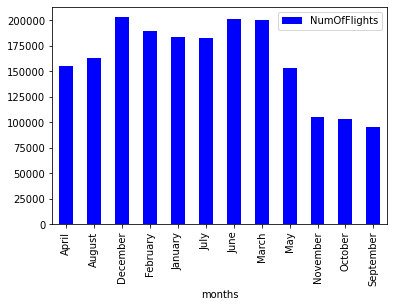

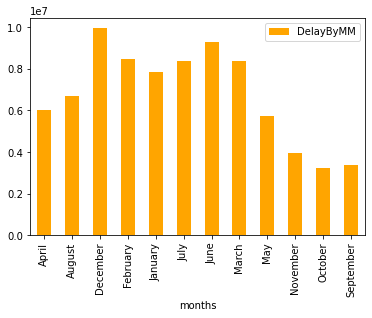

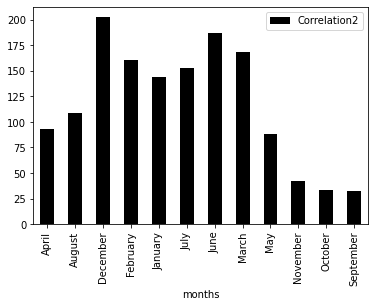

In [174]:
#Exercici 2

#Number of flights per month vs the amount of delay per month

#NumOfFlights_SORTED = df.groupby(df['Date (MM/DD/YYYY)'].dt.strftime('%B'))['Date (MM/DD/YYYY)'].count().sort_values(ascending=False)
NumOfFlights = df.groupby(df['Date (MM/DD/YYYY)'].dt.strftime('%B'))['Date (MM/DD/YYYY)'].count()

DelayByMM = df.groupby(df['Date (MM/DD/YYYY)'].dt.strftime('%B'))['ArrDelay'].sum()

#months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

months = df.groupby(df['Date (MM/DD/YYYY)'].dt.strftime('%B')).groups.keys()

zipped = list(zip(months, NumOfFlights, DelayByMM))
NEWdf = pd.DataFrame(zipped, columns=['months', 'NumOfFlights', 'DelayByMM'])

NEWdf['Correlation1'] = NEWdf['DelayByMM']/NEWdf['NumOfFlights']
NEWdf['Correlation2'] = (NEWdf['DelayByMM']*NEWdf['NumOfFlights'])/(10**10)

sorted_Correlation = NEWdf.sort_values(by='Correlation2', ascending=False)
print(sorted_Correlation)

#PLOTS

NEWdf[['months', 'NumOfFlights']].plot(x='months', kind='bar', color='blue')
NEWdf[['months', 'DelayByMM']].plot(x='months', kind='bar', color='orange')
NEWdf[['months', 'Correlation2']].plot(x='months', kind='bar', color='black')


#-> Veiem que els mesos amb més "Activitat" seran els que tenen més demanda de vols amb menys temps de ajustament de delays.
#-> Es a dir, desembre (per raons de: visites a familiars, amics, dies festius nacionals, etc.) és el mes amb més activitat
#   , a més, no ha tingut temps per ajustar-se al canvi entre la diferència de novembre que ha tingut molta menys a activitat.
#   Setembre ha tingut temps per ajustar-se a la activitat dels darrers 3 mesos d'activitat alta, a més de tenir en sí el
#   número de vols més baix de l'any. 

In [168]:
#Exercici 3

NEWdf.to_csv('DelayStudyDataset.csv', index = True)
